In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets.samples_generator import make_classification
import torch
from torch.utils.data import Dataset


In [2]:
gnm2 = np.load('spikes_gnm2.npy')
nm2 = np.load('spikes_nm2.npy')
nnm2 = np.load('spikes_nnm2.npy')
# spont = np.load('spontaneous1.npy')
print(gnm2.shape)
print(nm2.shape)
print(nnm2.shape)
# print(spont.shape)

(123, 14999, 120)
(123, 14999, 120)
(123, 14999, 120)


In [3]:
f = lambda x: np.mean(x, axis=2, keepdims=False).astype(np.float64)
data = [f(gnm2), f(nm2), f(nnm2)]
label = [np.zeros((gnm2.shape[1]), dtype=np.int64), np.ones((nm2.shape[1]), dtype=np.int64), np.ones((nnm2.shape[1]), dtype=np.int64) * 2]
Xs = np.concatenate(data, axis=1).transpose((1, 0))
ys = np.concatenate(label, )
print(f'the shape of Xs: {Xs.shape}')
print(f'the shape of ys: {ys.shape}')

the shape of Xs: (44997, 123)
the shape of ys: (44997,)


In [17]:
# shuffle
np.random.seed(615)
order = np.arange(ys.shape[0])
np.random.shuffle(order)

In [20]:
Xs, ys = Xs[order], ys[order]

In [23]:
# split them into train_set and val_set
rate = 0.6
split = int(rate * ys.shape[0])
Xs_train, ys_train = Xs[:split], ys[:split]
Xs_val, ys_val = Xs[split:], ys[split:]

In [4]:
# check the most active neuron
y = lambda x: np.argmax(np.sum(x, axis=1, keepdims=False))
most_active = [y(data[0]), y(data[1]), y(data[2])]
print(most_active)

[43, 119, 42]


In [24]:
# First, reduce the dimentionality of DATA by Linear Discriminative Analysis (LDA).
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(Xs_train, ys_train)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

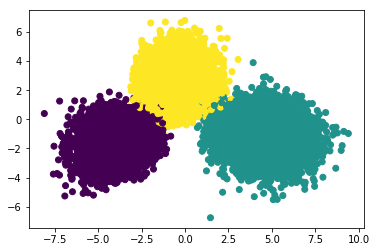

In [25]:
# train
X_new_train = lda.transform(Xs_train)
plt.scatter(X_new_train[:, 0], X_new_train[:, 1], marker='o', c=ys_train)
plt.show()

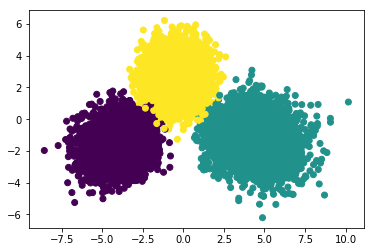

In [26]:
# val
X_new_val = lda.transform(Xs_val)
plt.scatter(X_new_val[:, 0], X_new_val[:, 1], marker='o', c=ys_val)
plt.show()

In [27]:
# Second, cluster by kNN.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_new_train, ys_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
knn.score(X_new_val, ys_val)

0.9980554475248625

In [14]:
np.random.seed(20)

In [ ]:
a = np.arange(10)